# 🌾 Pendahuluan


Dataset ini disusun untuk memprediksi tanaman yang paling cocok untuk ditanam berdasarkan beberapa parameter agroklimat. Dataset ini biasanya digunakan dalam pertanian presisi dan aplikasi pembelajaran mesin yang bertujuan untuk mendukung petani, penasihat pertanian, dan pembuat kebijakan.

Fitur (Input):

N – Kandungan Nitrogen dalam Tanah (dalam mg/kg)
P – Kandungan Fosfor dalam Tanah (dalam mg/kg)
K – Kandungan Kalium dalam Tanah (dalam mg/kg)
Suhu – Suhu Rata-rata dalam °C
Kelembaban – Kelembaban Relatif Rata-rata dalam %
ph – Nilai pH Tanah
Curah Hujan – Curah Hujan dalam mm

Label (Output):

label – Tanaman yang paling sesuai dengan kondisi yang diberikan (misalnya, padi, jagung, kapas, dll.)

# Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# Read Data

In [2]:
df_rekomendasi_tanaman = pd.read_csv('Dataset/Crop_recommendation.csv')
df_rekomendasi_tanaman


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,padi
1,85,58,41,21.770462,80.319644,7.038096,226.655537,padi
2,60,55,44,23.004459,82.320763,7.840207,263.964248,padi
3,74,35,40,26.491096,80.158363,6.980401,242.864034,padi
4,78,42,42,20.130175,81.604873,7.628473,262.717340,padi
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,kopi
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,kopi
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,kopi
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,kopi


In [3]:
# Jumlah Baris dan Kolom
print(f"Dimensi dataset (baris, kolom): {df_rekomendasi_tanaman.shape}")

Dimensi dataset (baris, kolom): (2200, 8)


In [4]:
df_rekomendasi_tanaman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df_rekomendasi_tanaman['label'].value_counts()

label
padi              100
jagung            100
kacang arab       100
kacang merah      100
kacang gude       100
kacang ngengat    100
kacang hijau      100
kacang hitam      100
kacang lentil     100
delima            100
pisang            100
mangga            100
anggur            100
semangka          100
blewah            100
apel              100
jeruk             100
pepaya            100
kelapa            100
kapas             100
jute              100
kopi              100
Name: count, dtype: int64

# Independent (X) & Dependent (Y) Variable

In [6]:
x = df_rekomendasi_tanaman.iloc[:,:7].values
y = df_rekomendasi_tanaman.iloc[:,7].values
x

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]], shape=(2200, 7))

In [7]:
y

array(['padi', 'padi', 'padi', ..., 'kopi', 'kopi', 'kopi'],
      shape=(2200,), dtype=object)

# Split Train Test

In [8]:
x_train, x_test, y_train, y_test = train_test_split (x,
                                                     y, 
                                                     test_size=0.25, 
                                                     random_state=5)

# Create Model (Random Forest) & Training

In [9]:
RF_Model = RandomForestClassifier(n_estimators=100, random_state=0)
RF_Model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Testing Model

In [10]:
y_predict = RF_Model.predict(x_test)
y_predict

array(['anggur', 'blewah', 'kelapa', 'kacang arab', 'semangka', 'pepaya',
       'pepaya', 'delima', 'kacang gude', 'apel', 'kelapa', 'pepaya',
       'delima', 'jagung', 'kacang hitam', 'kacang arab', 'kapas',
       'blewah', 'kacang ngengat', 'delima', 'blewah', 'kacang arab',
       'kopi', 'delima', 'kacang hitam', 'jute', 'jeruk', 'semangka',
       'padi', 'jeruk', 'apel', 'kacang ngengat', 'jute', 'jute',
       'pisang', 'kacang ngengat', 'pepaya', 'kacang hijau',
       'kacang merah', 'kacang hitam', 'mangga', 'kacang arab', 'jagung',
       'pepaya', 'pisang', 'kacang hitam', 'kelapa', 'jeruk', 'jeruk',
       'jagung', 'kopi', 'kacang ngengat', 'kacang gude', 'jeruk',
       'mangga', 'jeruk', 'blewah', 'kacang gude', 'kacang hijau',
       'kacang ngengat', 'kapas', 'kacang hitam', 'kacang arab', 'kapas',
       'kacang hijau', 'kacang hijau', 'kacang arab', 'pepaya', 'kelapa',
       'pisang', 'jute', 'jagung', 'delima', 'semangka', 'pisang',
       'kacang merah', 'pepa

# Evaluasi Model


Test Accuracy : 0.9981818181818182

Classification Report :
                 precision    recall  f1-score   support

        anggur       1.00      1.00      1.00        21
          apel       1.00      1.00      1.00        30
        blewah       1.00      1.00      1.00        32
        delima       1.00      1.00      1.00        26
        jagung       1.00      1.00      1.00        31
         jeruk       1.00      1.00      1.00        27
          jute       0.95      1.00      0.97        18
   kacang arab       1.00      1.00      1.00        26
   kacang gude       1.00      1.00      1.00        31
  kacang hijau       1.00      1.00      1.00        24
  kacang hitam       1.00      1.00      1.00        26
 kacang lentil       1.00      1.00      1.00        21
  kacang merah       1.00      1.00      1.00        19
kacang ngengat       1.00      1.00      1.00        29
         kapas       1.00      1.00      1.00        16
        kelapa       1.00      1.00      

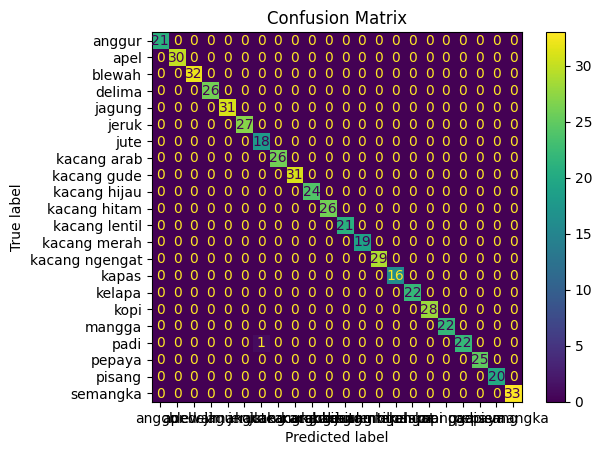

In [11]:
print("\nTest Accuracy :", metrics.accuracy_score(y_test, y_predict))
print("\nClassification Report :\n", 
      metrics.classification_report(y_test, y_predict))

ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.title("Confusion Matrix")
plt.show()

# Visualisasi Data

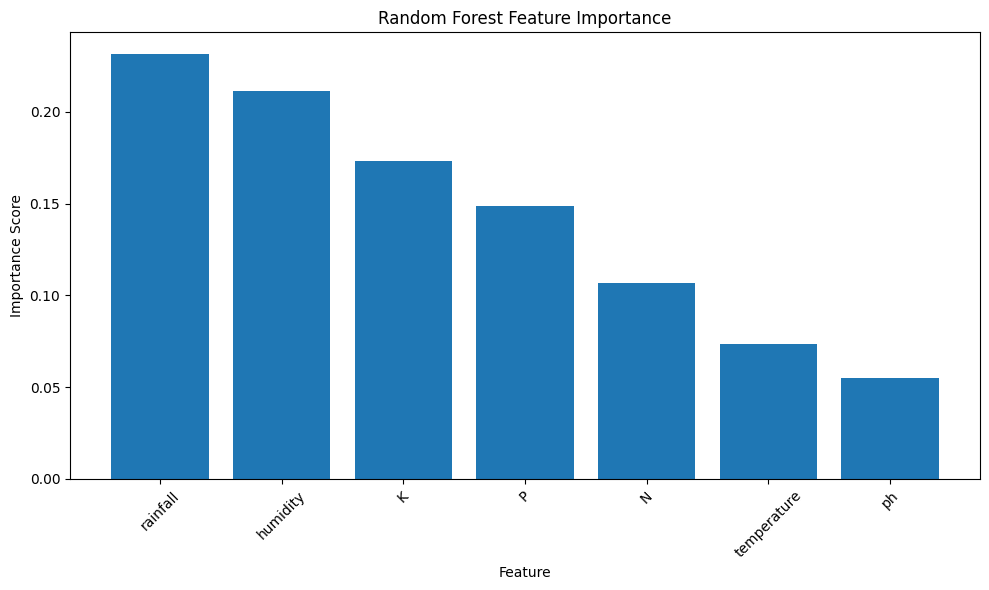

In [12]:
# nama fitur
fn = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# ambil fitur dalam model
importances = RF_Model.feature_importances_

# arutkan dari terbesar ke terkecil
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), np.array(fn)[indices], rotation=45)
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


# Test New Data

In [13]:
input_data = [[7.2, 0.13, 0.11, 1.7, 0.076, 21, 78]]
input_data

[[7.2, 0.13, 0.11, 1.7, 0.076, 21, 78]]

In [14]:
predict_data = RF_Model.predict(input_data)
print("Hasil Prediksi : ", predict_data)

Hasil Prediksi :  ['kacang merah']


# Save Model & Deploy

In [15]:
# import pickle

# with open("Model/RF_RekomendasiTanaman_model.pkl", "wb") as f:
#      pickle.dump(RF_Model, f)

# print("Model RF berhasil disimpan sebagai RF_RekomendasiTanaman_model.pkl")